# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score
import seaborn as sns

# Class impl


In [18]:
class LogisticRegression:

    #defing vars needed
    def __init__(self,ler_r=0.001,nf_iters=1000):
        self.ler_r=ler_r
        self.nf_iters=nf_iters
        self.weights=None
        self.bias=None
        self.acc_history=[]

    def compute_gradients(self,X,y,y_pred):
        n_samples=X.shape[0]
        dw=(1/n_samples)*X.T @(y_pred-y)
        db=(1/n_samples)*np.sum(y_pred-y)
        return dw,db
    def fit(self,X,y):
        n_samples,n_features=X.shape

        self.weights=np.zeros(n_features)
        self.bias=0

        for i in range(self.nf_iters):
            LinModel= X@(self.weights)+self.bias
            y_pred=self.sigmoid(LinModel)

            dw,db=self.compute_gradients(X,y,y_pred)

            self.weights-=self.ler_r*dw
            self.bias-=self.ler_r*db

            predictions=self.predict(X)
            self.acc_history.append(accuracy(y,predictions))

    def sigmoid(self,x):
        x = np.clip(x, -500, 500) 
        return (1/(1+np.exp(-x)))
    
    def predict(self,X):
        LinModel=X@(self.weights)+self.bias
        y_pred=self.sigmoid(LinModel)

        y_predicted_cls= [1 if i>0.5 else 0 for i in y_pred]
        return y_predicted_cls


        


In [13]:
def accuracy(y_true,y_pred):
    accuracy=np.sum(y_pred==y_true)/len(y_true)
    return accuracy

In [5]:
bc=datasets.load_breast_cancer()
X,y=bc.data,bc.target

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [19]:
regres_cls=LogisticRegression()
regres_cls.fit(X=X_train,y=y_train)

In [14]:
predictions=regres_cls.predict(X_test)
print("ACCURACY: ",accuracy(y_test,predictions))

ACCURACY:  0.9473684210526315


# PLOTS

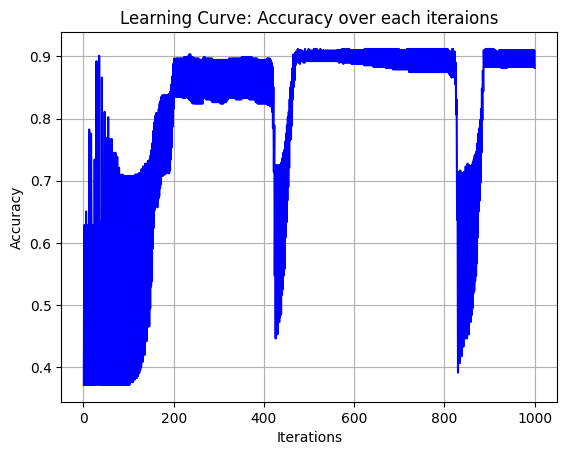

In [20]:
plt.plot(range(1,len(regres_cls.acc_history)+1),regres_cls.acc_history,color="blue")
plt.title("Learning Curve: Accuracy over each iteraions")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

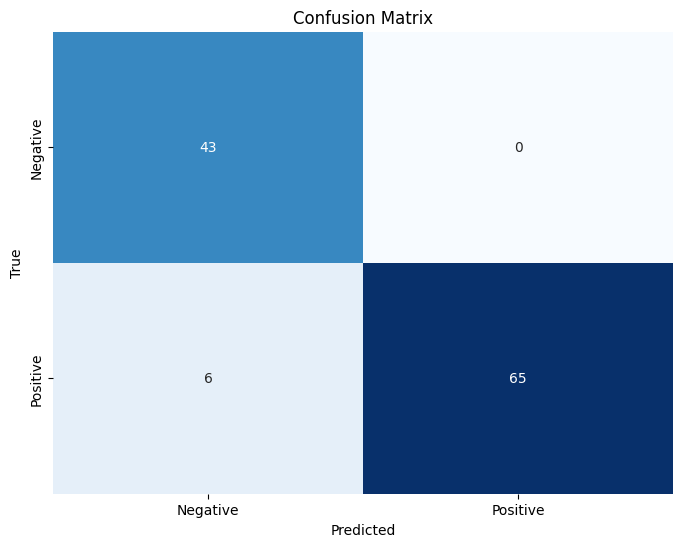

In [23]:
# Get the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


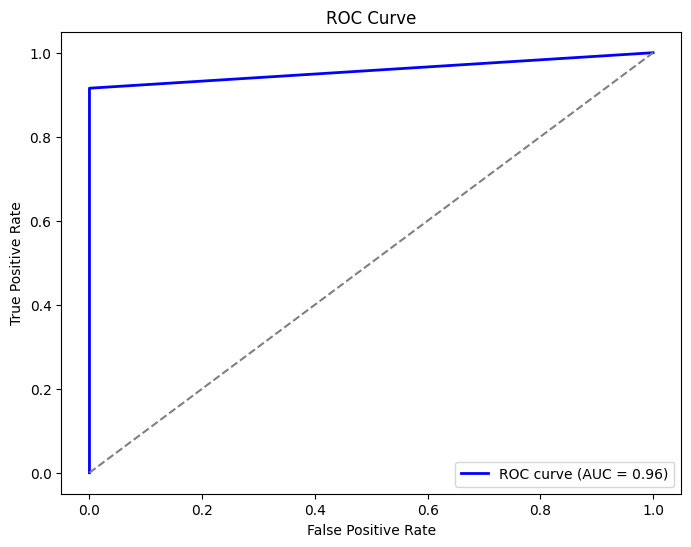

In [27]:
# Get predicted probabilities (not binary predictions)
y_pred_prob = regres_cls.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
